🎯 Desafio dia 98 — Mobilidade Urbana

📂 Dataset: desafio_dia_98_mobilidade_urbana.csv

🔍 Contexto: Um estudo de mobilidade urbana coletou dados sobre como as pessoas se deslocam nos dias úteis da semana. O objetivo é entender padrões de transporte, tempo e distância, além de propor uma previsão leve de deslocamento.

🛠️ Tarefas do desafio
🧹 Tratamento de dados

    Preencha os valores ausentes em tempo_deslocamento_min com a média por modo de transporte (groupby('modo_transporte')).

    Crie uma nova coluna chamada velocidade_kmh, calculada como:

    velocidade_kmh = distancia_km / (tempo_deslocamento_min / 60)

📊 Análise geral

    Qual modo de transporte possui a maior média de velocidade?

    Em qual dia da semana o tempo médio de deslocamento foi o maior?

📈 Visualização de dados

    Crie um boxplot da coluna tempo_deslocamento_min para cada modo_transporte.

    Faça um gráfico de barras com a velocidade média por modo de transporte.

🤖 Machine Learning — Regressão leve

    Modele a previsão de tempo_deslocamento_min com base em:

        distancia_km, modo_transporte (via get_dummies), e dia_semana

    Use:

        train_test_split, LinearRegression, mean_squared_error

        Gere também um gráfico de dispersão entre y_test e y_pred



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("desafio_dia_98_mobilidade_urbana.csv")
df.head()

,id_usuario,dia_semana,modo_transporte,tempo_deslocamento_min,distancia_km
0,1474,Quarta,Ônibus,43.2,12.3
1,1554,Quinta,Bicicleta,30.9,11.0
2,1180,Quarta,Metrô,43.6,17.9
3,1447,Segunda,Carro,40.2,9.4
4,1603,Quarta,A Pé,30.6,15.4


In [4]:
#Preencha os valores ausentes em tempo_deslocamento_min com a média por modo de transporte.
df["tempo_deslocamento_min"] = df["tempo_deslocamento_min"].fillna(
    df.groupby("modo_transporte")["tempo_deslocamento_min"].transform("mean")
)
df["tempo_deslocamento_min"].isna().sum()

np.int64(0)

In [5]:
#Crie uma nova coluna chamada velocidade_kmh, calculada como: velocidade_kmh = distancia_km / (tempo_deslocamento_min / 60)
df["velocidade_kmh"] = df["distancia_km"] / (df["tempo_deslocamento_min"] / 60)
df.head()

,id_usuario,dia_semana,modo_transporte,tempo_deslocamento_min,distancia_km,velocidade_kmh
0,1474,Quarta,Ônibus,43.2,12.3,17.083333
1,1554,Quinta,Bicicleta,30.9,11.0,21.359223
2,1180,Quarta,Metrô,43.6,17.9,24.633028
3,1447,Segunda,Carro,40.2,9.4,14.029851
4,1603,Quarta,A Pé,30.6,15.4,30.196078


In [8]:
#Qual modo de transporte possui a maior média de velocidade?
transporte_maior_velocidade = df.groupby("modo_transporte")["velocidade_kmh"].mean().sort_values(ascending=False)
print(transporte_maior_velocidade)

modo_transporte
Metrô        25.874943
A Pé         25.276618
Bicicleta    24.824226
Carro        24.471234
Ônibus       21.677290
Name: velocidade_kmh, dtype: float64


In [10]:
#Em qual dia da semana o tempo médio de deslocamento foi o maior?
dia_maior_tempo_deslocamento = df.groupby("dia_semana")["tempo_deslocamento_min"].mean().sort_values(ascending=False)
print(dia_maior_tempo_deslocamento)

dia_semana
Quinta     35.223751
Segunda    35.101802
Quarta     34.911477
Terça      34.189796
Sexta      32.174589
Name: tempo_deslocamento_min, dtype: float64


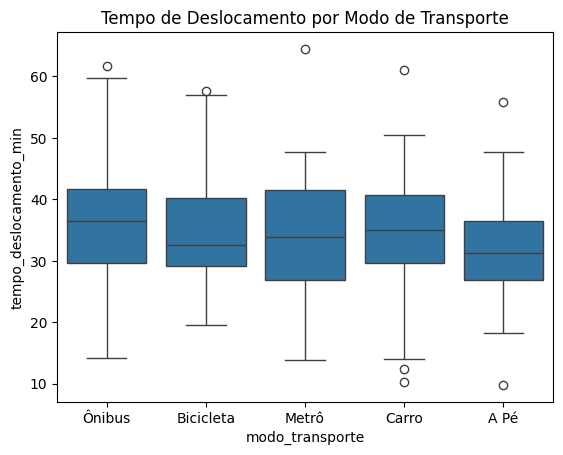

In [12]:
#Crie um boxplot da coluna tempo_deslocamento_min para cada modo_transporte.
sns.boxplot(data=df, x="modo_transporte", y="tempo_deslocamento_min")
plt.title("Tempo de Deslocamento por Modo de Transporte")
plt.show()

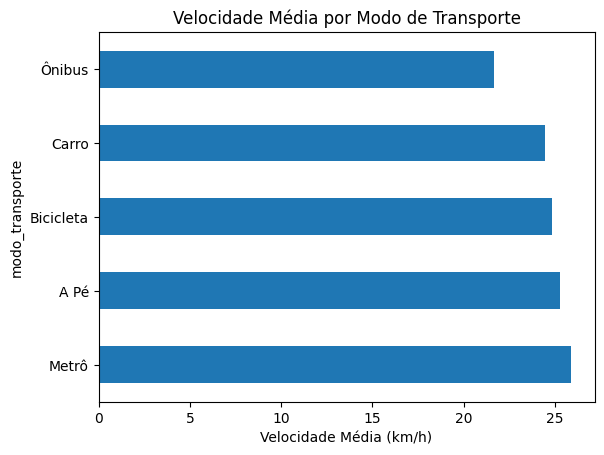

In [14]:
#Faça um gráfico de barras com a velocidade média por modo de transporte.
transporte_maior_velocidade.plot(kind="barh")
plt.xlabel("Velocidade Média (km/h)")
plt.title("Velocidade Média por Modo de Transporte")
plt.show()

In [18]:
#Modele a previsão de tempo_deslocamento_min com base em:
X = df[["distancia_km", "modo_transporte", "dia_semana"]]
y = df["tempo_deslocamento_min"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

print(mean_squared_error(y_test, y_pred))

110.2257001923473


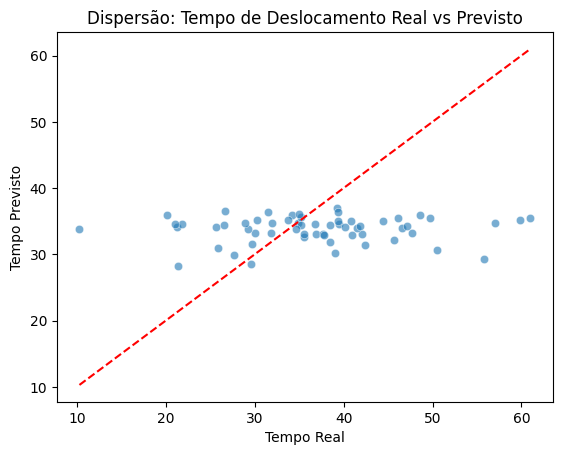

In [21]:
#Gere também um gráfico de dispersão entre y_test e y_pred
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Tempo Real")
plt.ylabel("Tempo Previsto")
plt.title("Dispersão: Tempo de Deslocamento Real vs Previsto")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.show()